<a href="https://colab.research.google.com/github/atpathak/ML-code-templates_2026/blob/main/RandomForest_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
print(regressor.predict([[6.5]]))

[167000.]


/tmp/ipython-input-2302935198.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


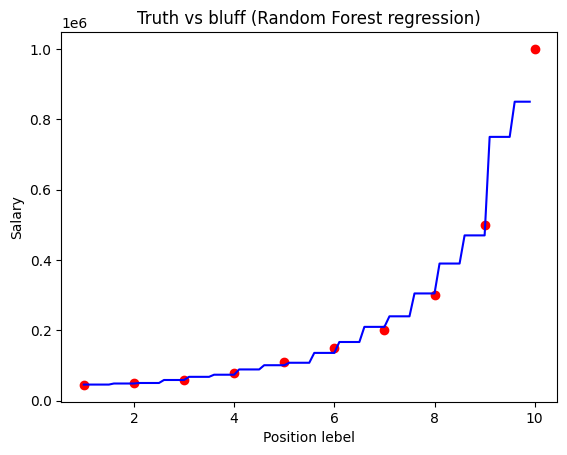

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth vs bluff (Random Forest regression)')
plt.xlabel('Position lebel')
plt.ylabel('Salary')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 2384100000.0
R-squared: 0.9704434230386582


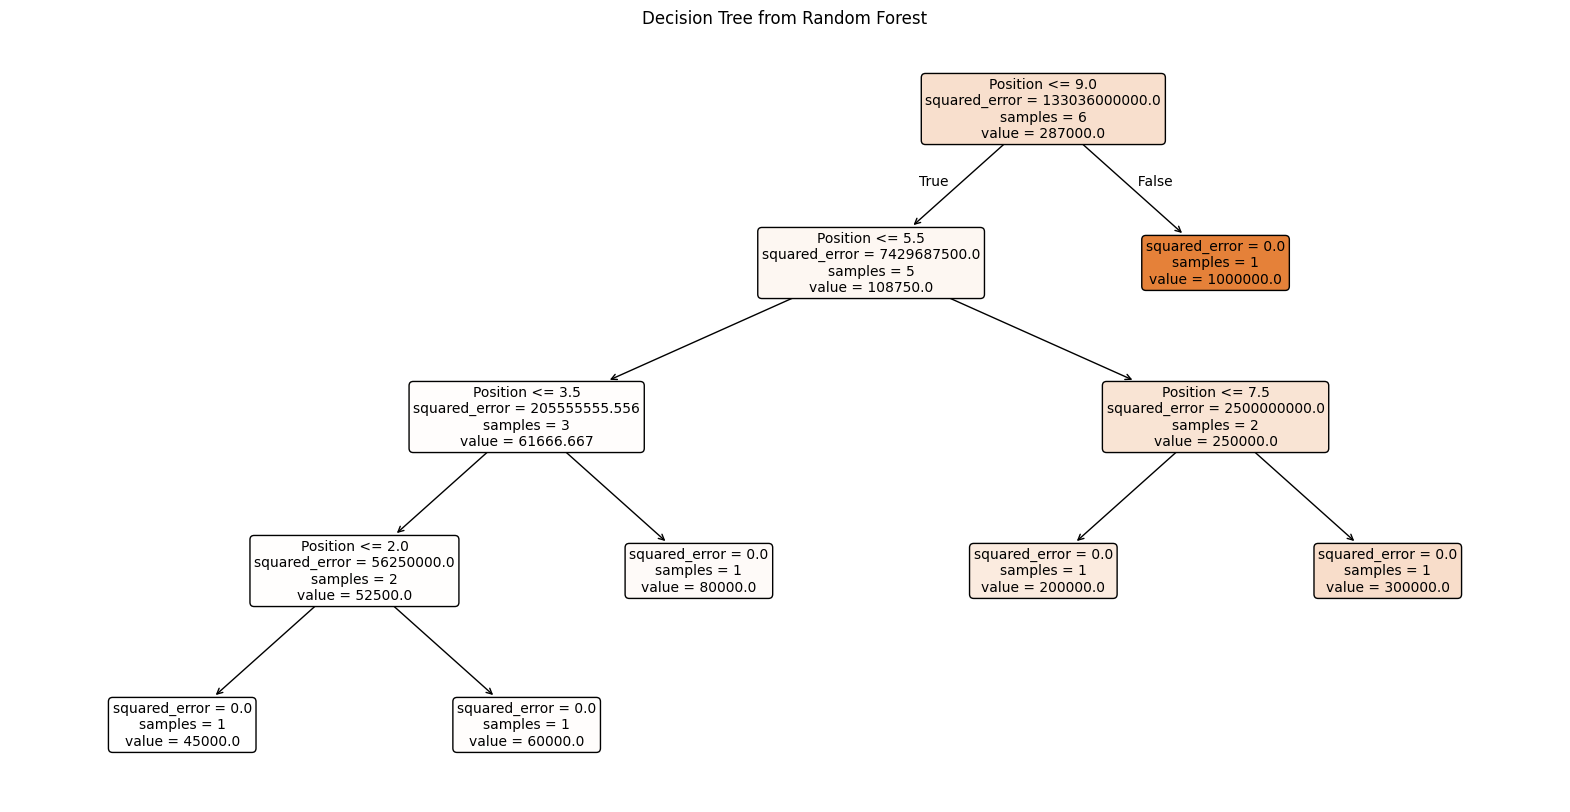

In [ ]:
from sklearn.tree import plot_tree
tree_to_plot = regressor.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=dataset.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x_categorical = dataset.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = dataset.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

In [ ]:
print(x)

[[      1   45000       0]
 [      2   50000       4]
 [      3   60000       8]
 [      4   80000       5]
 [      5  110000       3]
 [      6  150000       7]
 [      7  200000       6]
 [      8  300000       9]
 [      9  500000       1]
 [     10 1000000       2]]


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])